In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [2]:
from __future__ import division

from pandas_datareader import DataReader

# For time stamps
from datetime import datetime



In [4]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [5]:
GOOGL.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,1101.280029,1088.000000,1089.099976,1093.890015,988500,1093.890015
2019-06-18,1118.780029,1100.790039,1111.500000,1105.239990,1726300,1105.239990
2019-06-19,1109.430054,1096.030029,1107.239990,1104.510010,1335700,1104.510010
2019-06-20,1122.719971,1107.000000,1121.699951,1113.199951,1200900,1113.199951
2019-06-21,1126.569946,1109.719971,1109.859985,1125.369995,2538700,1125.369995


In [6]:
GOOGL.describe()


,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1293.085929,1266.746285,1279.640866,1280.860631,1.804168e+06,1280.860631
std,117.269407,119.135625,117.979024,118.208951,9.183841e+05,118.208951
min,1066.910034,1008.869995,1056.369995,1054.130005,6.401000e+05,1054.130005
25%,1200.349976,1177.250000,1191.829956,1190.130005,1.203900e+06,1190.130005
50%,1277.709961,1252.349976,1265.800049,1265.229980,1.531600e+06,1265.229980
75%,1382.780029,1350.729980,1361.579956,1369.280029,2.077200e+06,1369.280029
max,1530.739990,1520.979980,1527.199951,1524.869995,6.060800e+06,1524.869995


In [7]:
GOOGL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-17 to 2020-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


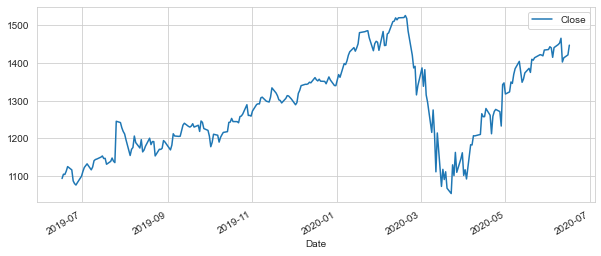

In [8]:
GOOGL['Close'].plot(legend=True, figsize=(10,4))


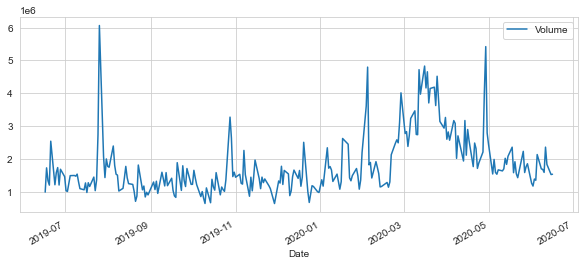

In [9]:
GOOGL['Volume'].plot(legend=True, figsize=(10,4))


In [10]:
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    GOOGL[column_name] = GOOGL['Close'].rolling(ma).mean()


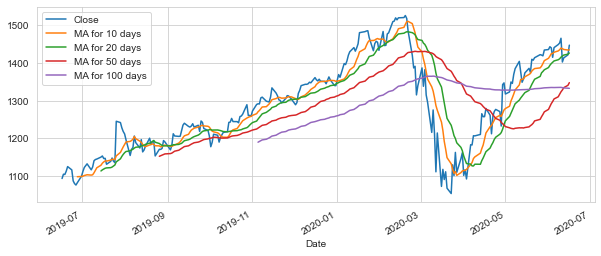

In [11]:
GOOGL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))


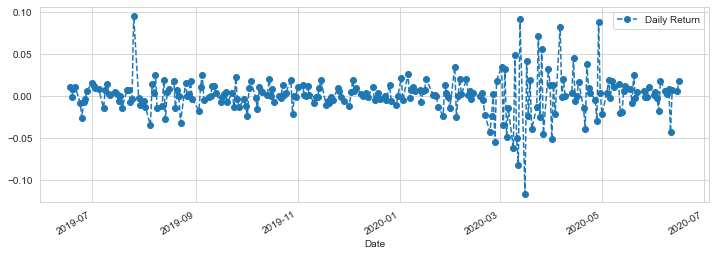

In [12]:
GOOGL['Daily Return'] = GOOGL['Close'].pct_change()

# Lets plot the daily return percentage
GOOGL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')


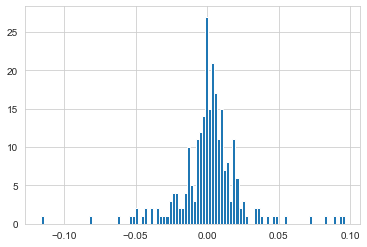

In [13]:
GOOGL['Daily Return'].hist(bins=100)


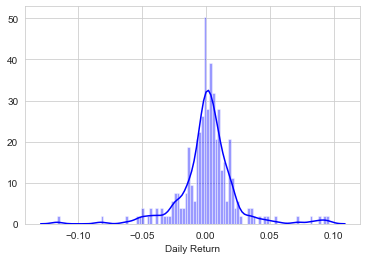

In [14]:
sns.distplot(GOOGL['Daily Return'].dropna(), bins=100, color='blue')


In [15]:
closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']


In [16]:
closingprice_df.head(35)

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-06-17,193.889999,1093.890015,132.850006,1886.030029
2019-06-18,198.449997,1105.239990,135.160004,1901.369995
2019-06-19,197.869995,1104.510010,135.690002,1908.790039
2019-06-20,199.460007,1113.199951,136.949997,1918.189941
2019-06-21,198.779999,1125.369995,136.970001,1911.300049
2019-06-24,198.580002,1116.699951,137.779999,1913.900024
2019-06-25,195.570007,1087.579956,133.429993,1878.270020
2019-06-26,199.800003,1080.319946,133.929993,1897.829956
2019-06-27,199.740005,1076.630005,134.149994,1904.280029


In [17]:
tech_returns = closingprice_df.pct_change()

In [18]:
tech_returns.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-06-17,NaN,NaN,NaN,NaN
2019-06-18,0.023518,0.010376,0.017388,0.008133
2019-06-19,-0.002923,-0.000660,0.003921,0.003902
2019-06-20,0.008036,0.007868,0.009286,0.004925
2019-06-21,-0.003409,0.010932,0.000146,-0.003592


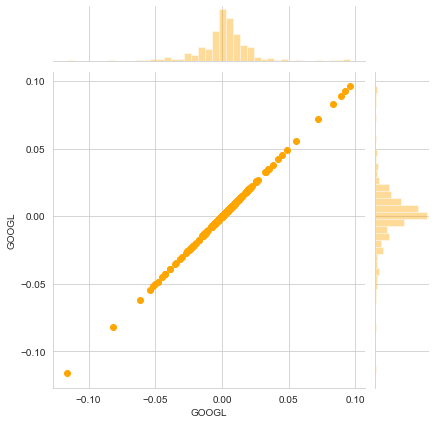

In [19]:
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')

C:\Users\Nisarg Patoliya\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


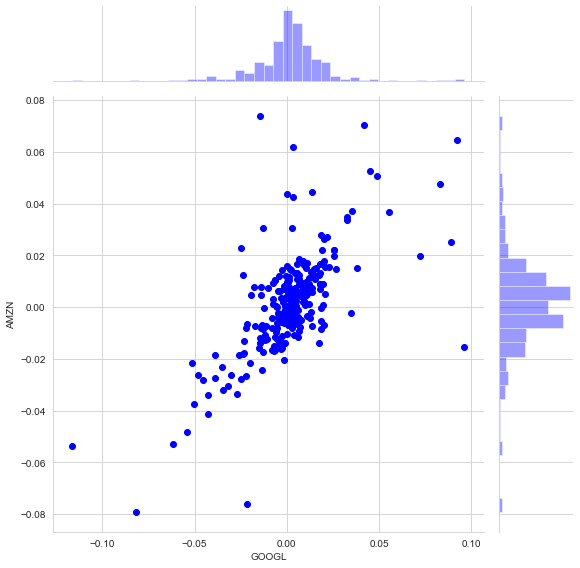

In [20]:
sns.jointplot('GOOGL','AMZN',tech_returns, kind='scatter',size=8, color='blue')

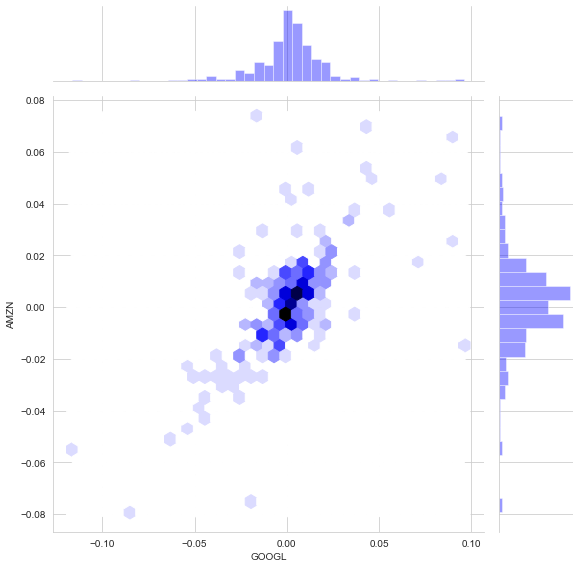

In [21]:
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',size=8, color='blue')


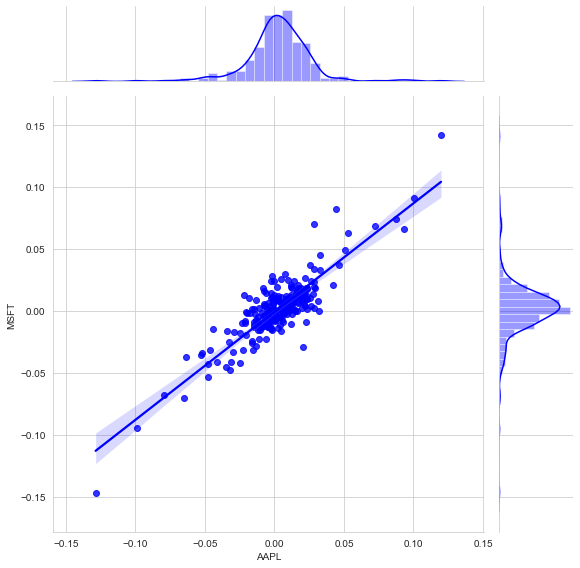

In [22]:
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=8, color='blue')

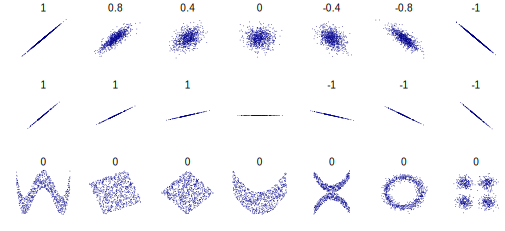

In [23]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


C:\Users\Nisarg Patoliya\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


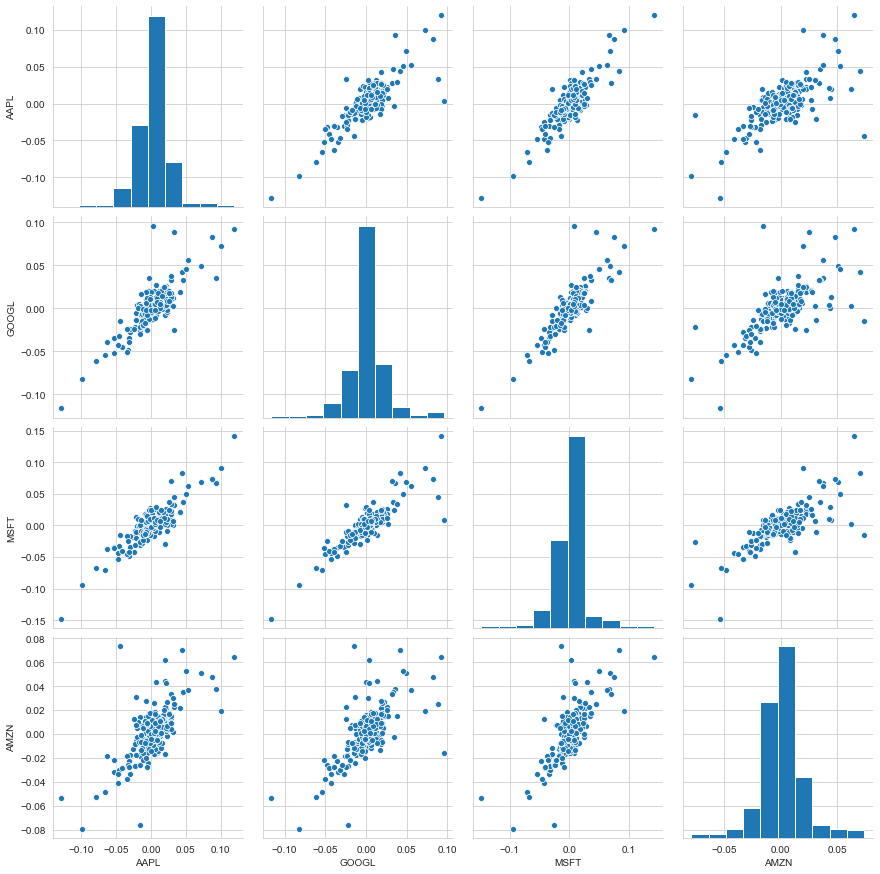

In [24]:
sns.pairplot(tech_returns.dropna(),size=3)


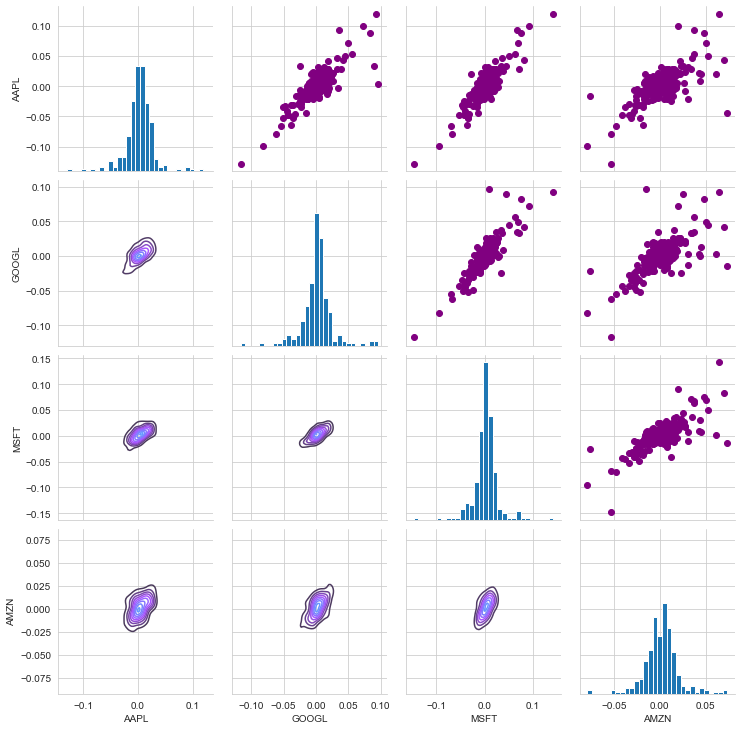

In [25]:
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


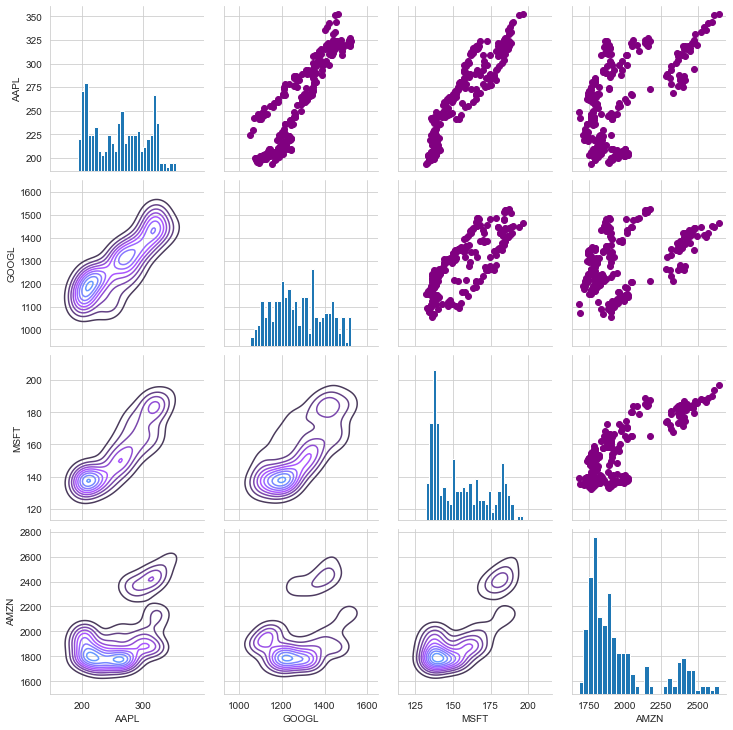

In [26]:
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


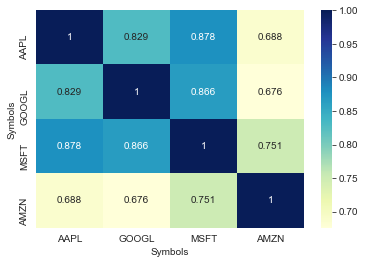

In [27]:
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

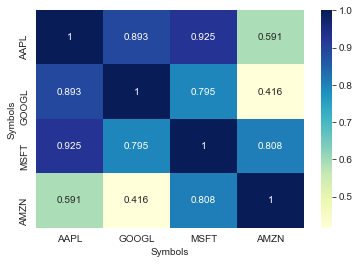

In [28]:
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')


In [29]:
rets = tech_returns.dropna()


In [30]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-06-18,0.023518,0.010376,0.017388,0.008133
2019-06-19,-0.002923,-0.000660,0.003921,0.003902
2019-06-20,0.008036,0.007868,0.009286,0.004925
2019-06-21,-0.003409,0.010932,0.000146,-0.003592
2019-06-24,-0.001006,-0.007704,0.005914,0.001360


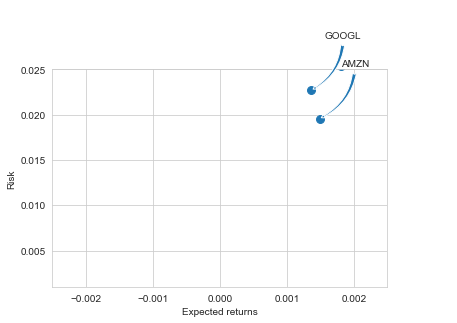

In [31]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))


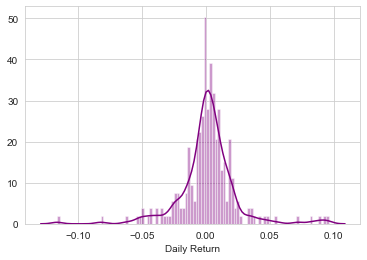

In [32]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(GOOGL['Daily Return'].dropna(),bins=100,color='purple')


In [33]:
rets["GOOGL"].quantile(0.05)

-0.03488707270559526

In [34]:
rets["AMZN"].quantile(0.05)

-0.02763362405276297

In [35]:
rets["AAPL"].quantile(0.05)

-0.034258428085985886

In [36]:
rets["MSFT"].quantile(0.05)

-0.03482088175320066

In [37]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-06-18,0.023518,0.010376,0.017388,0.008133
2019-06-19,-0.002923,-0.000660,0.003921,0.003902
2019-06-20,0.008036,0.007868,0.009286,0.004925
2019-06-21,-0.003409,0.010932,0.000146,-0.003592
2019-06-24,-0.001006,-0.007704,0.005914,0.001360


In [38]:
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']


In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [40]:
# For Google Stock - GOOGL
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,194.960007,192.169998,192.899994,193.889999,14669100.0,191.603317
2019-06-18,200.289993,195.210007,196.050003,198.449997,26551000.0,196.109528
2019-06-19,199.880005,197.309998,199.679993,197.869995,21124200.0,195.536377
2019-06-20,200.610001,198.029999,200.369995,199.460007,21514000.0,197.107620
2019-06-21,200.850006,198.149994,198.800003,198.779999,47800600.0,196.435623


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

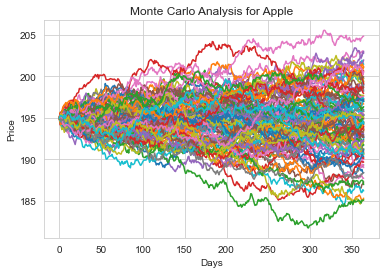

In [41]:
start_price = 194.960007

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')


In [42]:
AMZN.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,1895.689941,1875.449951,1876.500000,1886.030029,2634300,1886.030029
2019-06-18,1921.670044,1899.790039,1901.349976,1901.369995,3895700,1901.369995
2019-06-19,1919.579956,1892.469971,1907.839966,1908.790039,2895300,1908.790039
2019-06-20,1935.199951,1905.800049,1933.329956,1918.189941,3217200,1918.189941
2019-06-21,1925.949951,1907.579956,1916.099976,1911.300049,3933600,1911.300049


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

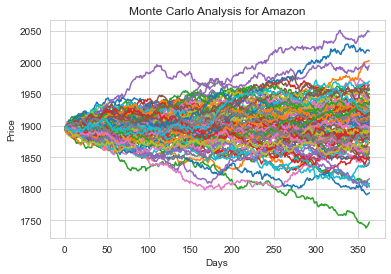

In [43]:
start_price = 1895.689941

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')


In [44]:
GOOGL.head()


,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2019-06-17,1101.280029,1088.000000,1089.099976,1093.890015,988500,1093.890015,NaN,NaN,NaN,NaN,NaN
2019-06-18,1118.780029,1100.790039,1111.500000,1105.239990,1726300,1105.239990,NaN,NaN,NaN,NaN,0.010376
2019-06-19,1109.430054,1096.030029,1107.239990,1104.510010,1335700,1104.510010,NaN,NaN,NaN,NaN,-0.000660
2019-06-20,1122.719971,1107.000000,1121.699951,1113.199951,1200900,1113.199951,NaN,NaN,NaN,NaN,0.007868
2019-06-21,1126.569946,1109.719971,1109.859985,1125.369995,2538700,1125.369995,NaN,NaN,NaN,NaN,0.010932


Text(0.5, 1.0, 'Monte Carlo Analysis for GOOGLE')

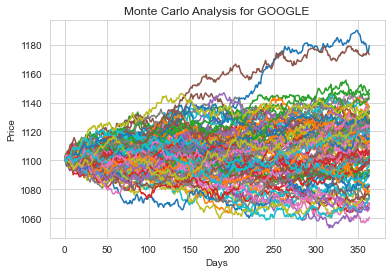

In [45]:
start_price = 1101.280029

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for GOOGLE')


In [46]:
MSFT.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,133.729996,132.529999,132.630005,132.850006,14517800.0,131.235123
2019-06-18,135.240005,133.570007,134.190002,135.160004,25934500.0,133.517029
2019-06-19,135.929993,133.809998,135.000000,135.690002,23744400.0,134.040604
2019-06-20,137.660004,135.720001,137.449997,136.949997,33042600.0,135.285248
2019-06-21,137.729996,136.460007,136.580002,136.970001,36727900.0,135.305038


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

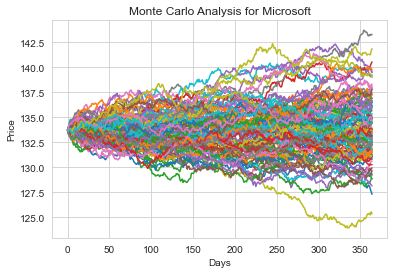

In [47]:
start_price = 133.729996

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')


In [48]:
start_price = 1101.280029

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Google Stock(GOOGL) after 365 days')

C:\Users\Nisarg Patoliya\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


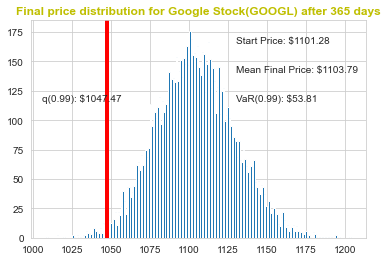

In [49]:
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')


In [50]:
start_price = 1895.689941

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Amazon Stock(AMZN) after 365 days')

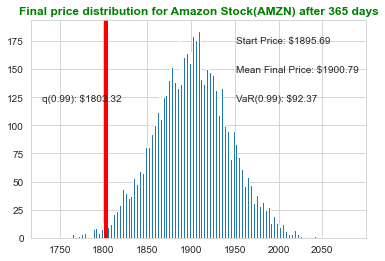

In [51]:
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')


In [52]:
# For Apple Stock Price
start_price = 194.960007

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

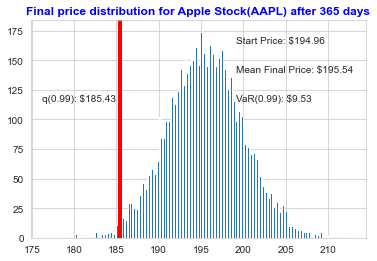

In [53]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')


In [54]:
# For Microsoft Stock Price
start_price = 133.729996

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Microsoft Stock(MSFT) after 365 days')

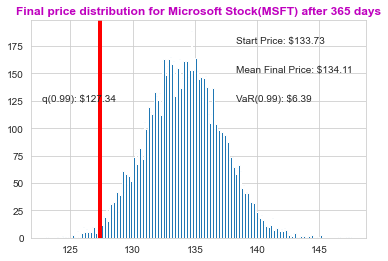

In [55]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')


In [56]:
# List of NYSE_stocks for analytics
NYSE_list = ['JNJ','NKE','WMT']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in NYSE_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [57]:
JNJ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-17,140.240005,139.210007,140.000000,139.440002,5562800.0,135.639435
2019-06-18,140.929993,139.789993,140.559998,140.229996,7122700.0,136.407898
2019-06-19,140.970001,139.910004,140.009995,140.449997,6393400.0,136.621902
2019-06-20,142.399994,141.000000,141.250000,142.210007,7335800.0,138.333939
2019-06-21,142.429993,141.009995,141.460007,142.089996,11272200.0,138.217178


In [58]:
JNJ.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,139.987707,137.313281,138.702609,138.689605,8.380854e+06,136.619493
std,8.282560,8.677351,8.440678,8.508484,3.941341e+06,9.001834
min,118.559998,109.160004,117.000000,111.139999,2.923300e+06,110.374878
25%,132.369995,130.130005,131.250000,131.130005,5.741400e+06,128.168732
50%,140.259995,137.259995,139.220001,139.380005,7.251200e+06,136.291168
75%,147.759995,145.259995,146.080002,146.440002,1.003820e+07,145.024673
max,157.000000,154.000000,155.570007,155.509995,2.586870e+07,154.439407


In [59]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-17 to 2020-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


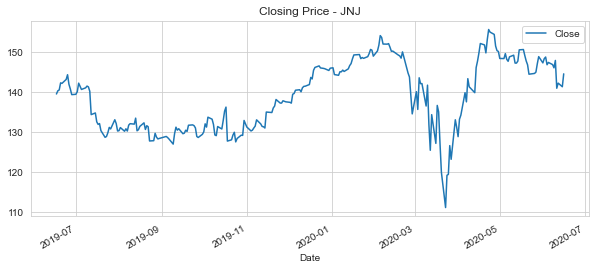

In [60]:
JNJ['Close'].plot(title='Closing Price - JNJ',legend=True, figsize=(10,4))


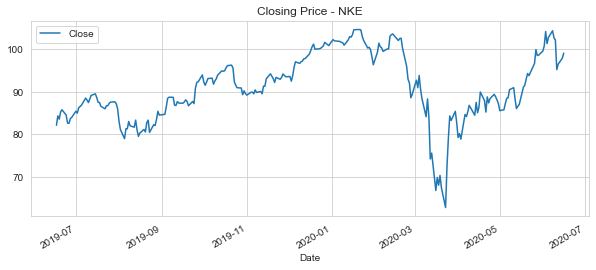

In [61]:
NKE['Close'].plot(title='Closing Price - NKE',legend=True, figsize=(10,4))


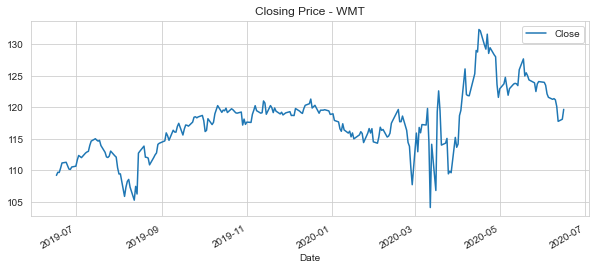

In [62]:
WMT['Close'].plot(title='Closing Price - WMT',legend=True, figsize=(10,4))


In [63]:
JNJ['Daily Return'] = JNJ['Close'].pct_change()


C:\Users\Nisarg Patoliya\Miniconda3\lib\site-packages\seaborn\distributions.py:222: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


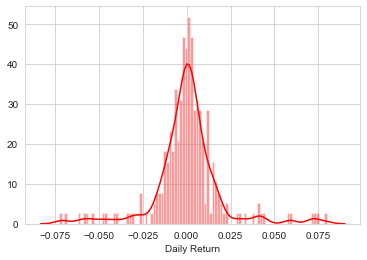

In [64]:
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='R')


In [65]:
(JNJ['Daily Return'].dropna()).quantile(0.05)


-0.029069305836347134

In [68]:
# For WMT stocks
WMT['Daily Return'] = WMT['Close'].pct_change()


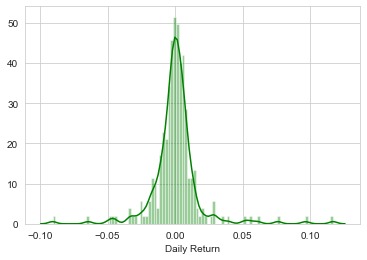

In [69]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='G')


In [70]:
(WMT['Daily Return'].dropna()).quantile(0.05)


-0.02213988594474967

In [71]:
NKE['Daily Return'] = NKE['Close'].pct_change()


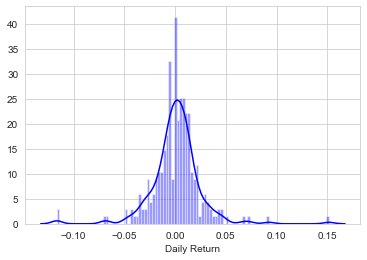

In [72]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='B')


In [73]:
(NKE['Daily Return'].dropna()).quantile(0.05)


-0.03400537443883223

In [ ]:
The 0.05 empirical quantile of NKE stock daily returns is at -0.034. That means that with 95% confidence, our worst daily loss will not exceed 3.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

